In [1]:
#Cài đặt thư viện backtrader để xây dựng chiến thuật
!pip install backtrader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.1/410.1 KB 12.6 MB/s eta 0:00:00


In [2]:
#cài đặt matplotlib 3.2.2
!pip uninstall matplotlib
!pip install matplotlib==3.2.2

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.2.2-cp39-cp39-linux_x86_64.whl size=12287064 sha256=6798befb4195ce59694130a1f3cd0d8259852cc518d81d63203af8e5e13

KHỞI ĐỘNG LẠI: Runtime/restart runtime

In [20]:
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
from google.colab import files
from IPython.display import Image

**Chiến thuật giao dịch theo chỉ báo**

Các chỉ báo (indicators) là công cụ phân tích kỹ thuật được phát triển gần đây, nhờ vào sự phát triển của khoa học máy tính. Bản chất của các chỉ báo là các hàm số toán học tích hợp vào phần mềm phân tích kỹ thuật để vẽ nên các biểu đồ kỹ thuật và được kiểm định hiệu quả đầu tư tốt. Các chỉ báo này chia làm hai nhóm: nhóm chỉ báo xu hướng và nhóm chỉ báo dao động.

**Nhóm chỉ báo xu hướng (trailing indicators)** bao gồm các chỉ báo có tính chất nhận biết được xu hướng và sự thay đổi xu hướng của thị trường, nhưng phản ứng chậm với các biến động ngắn hạn của giá, ví du như đường MA, MACD, Bolinger Band,…

**Nhóm chỉ báo dao động (momentum indicators)** bao gồm các chỉ báo có tính chất nhận biết ngay biến động của giá cả nhưng xác suất dự báo chính xác xu hướng của thị trường thấp, ví dụ như đường RSI, ROC, …


**1.   Nhóm chỉ báo xu hướng (Trailing Indicators)**

**1.1. Đường trung bình động giản đơn (Simple Moving Average _ SMA)**

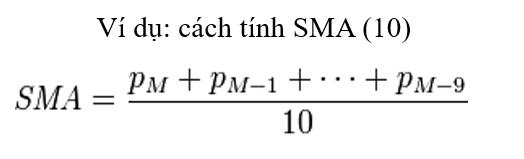

**Công dụng của đường SMA**

**Thứ nhất** là chỉ ra xu hướng của thị trường: Biểu đồ giá nằm trên đường trung bình di động cho thấy thị trường đang trong chiều hướng tăng giá. Biểu đồ giá nằm dưới đường trung bình di động cho thấy thị trường đang trong xu hướng giảm giá. 

**Thứ hai** là xác định tín hiệu mua/bán: Mua khi đường giá cắt đường trung bình từ dưới lên. Bán khi đường giá cắt đường trung bình từ trên xuống 

**Thứ ba** là đóng vai trò kháng cự và hỗ trợ: Trong xu hướng tăng, đường trung bình đóng vai trò là một đường hỗ trợ. Trong xu hướng giảm, đường trung bình đóng vai trò là một đường kháng cự

**Kỳ hạn (n) của đường trung bình**: Kỳ hạn của đường trung bình được nhà đầu tư chọn tùy thuộc vào kỳ hạn của xu hướng cần phân tích. Nếu cần phân tích xu hướng rất ngắn thì chọn 5 - 13 ngày, ngắn chọn 14 - 25 ngày, trung hạn yếu chọn 26 - 49 ngày, trung hạn chọn 50 - 100 ngày, dài hạn chọn 100 - 200 ngày. Các nhà đầu tư nên xu dụng kết hợp nhiều đường trung bình với các kỳ hạn khác nhau để xác định xu hướng chính xác hơn: (i) thị trường tăng, khi các đường trung bình ngắn lần lượt nằm lên trên đường trung bình dài; (ii) thị trường giảm, khi các đường trung bình ngắn lần lượt nằm dưới đường trung bình dài.

In [5]:
#CÀI ĐẶT THƯ VIỆN VNSTOCK
!pip install vnstock
from vnstock import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
#LẤY DỮ LIỆU CỔ PHIẾU BẤT KỲ, Ở ĐÂY ĐANG LẤY NLG
DT=stock_historical_data('VCB', '2016-01-03', '2021-01-03')
DT=DT.set_index('TradingDate')
DT.head()

,Open,High,Low,Close,Volume
TradingDate,,,,,
2016-01-04,23394.0,23500.0,22753.0,23073.0,761750
2016-01-05,22913.0,23180.0,22646.0,22699.0,1133260
2016-01-06,22699.0,23073.0,22699.0,22966.0,699490
2016-01-07,22859.0,22913.0,22432.0,22699.0,935460
2016-01-08,22592.0,22753.0,22272.0,22539.0,676340


In [27]:
list_i=[]
list_j=[]
list_value=[]
for i in range(10,20):
  for j in range(30,50):
#NỘI DUNG CHIẾN THUẬT
    class SmaCross(bt.Strategy):
      params=dict(pfast=i,pslow=j)#SMA(10) VÀ SMA(40)
      
      def log(self, txt, dt=None):
            ''' Logging function for this strategy'''
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

      def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast) #TẠO SMA(10)
        sma2=bt.ind.SMA(period=self.p.pslow) #TẠO SMA(40)
        self.crossover=bt.ind.CrossOver(sma1,sma2)
        self.dataclose = self.datas[0].close
        self.dataopen = self.datas[0].open
      
      def next(self):
        

        if not self.position:
          if self.crossover > 0: #SMA(10) cắt lên SMA(40)
            self.log('BUY CREATE, %.2f' % self.dataclose[0])
            self.buy() #MUA
        elif self.crossover < 0: #SMA (10) cắt xuống SMA(40)
          self.log('SELL CREATE, %.2f' % self.dataopen[0])           
          self.close() #BÁN
    #TẠO DỮ LIỆU
    data=bt.feeds.PandasData(dataname=DT)#DT LÀ DỮ LIÊU CỔ PHIẾU ĐÃ ĐƯỢC LẤY Ở TRÊN
        
    #thực thi chiến thuật
    cerebro=bt.Cerebro() #tạo cerebro

    cerebro.addstrategy(SmaCross) #truyền chiến thuật


    cerebro.adddata(data) #truyền dữ liệu 


    cerebro.broker.setcash(100000000) #số tiền đầu tư
    cerebro.broker.setcommission(commission=0.0) #số tiền hoa hồng/giao dịch
    cerebro.addsizer(bt.sizers.FixedSize, stake=100) #số cổ phiếu mua mỗi giao dịch


    print('số tiền trước khi thực hiện chiến thuật: %.2f' % cerebro.broker.getvalue())

    cerebro.run() #thực thi chiến thuật
    x=cerebro.broker.getvalue()
    print('số tiền sau khi thực hiện chiến thuật: %.2f' % x)
    list_i.append(i)
    list_j.append(j)
    list_value.append(x)

Streaming output truncated to the last 5000 lines.
2018-12-26, SELL CREATE, 40038.00
2019-01-22, BUY CREATE, 42017.00
2019-05-09, SELL CREATE, 49781.00
2019-06-17, BUY CREATE, 52673.00
2019-09-09, SELL CREATE, 58839.00
2019-09-16, BUY CREATE, 61655.00
2019-11-29, SELL CREATE, 65156.00
2019-12-26, BUY CREATE, 68049.00
2020-02-14, SELL CREATE, 68346.00
2020-04-24, BUY CREATE, 52910.00
2020-07-07, SELL CREATE, 64506.00
2020-08-18, BUY CREATE, 63201.00
2020-11-09, SELL CREATE, 65274.00
2020-11-18, BUY CREATE, 67271.00
số tiền sau khi thực hiện chiến thuật: 105349100.00
số tiền trước khi thực hiện chiến thuật: 100000000.00
2016-04-21, BUY CREATE, 22913.00
2016-06-28, SELL CREATE, 24462.00
2016-07-06, BUY CREATE, 26705.00
2016-09-07, SELL CREATE, 27239.00
2016-10-11, BUY CREATE, 27805.00
2016-10-14, SELL CREATE, 27437.00
2017-01-03, BUY CREATE, 27400.00
2017-03-02, SELL CREATE, 27658.00
2017-05-22, BUY CREATE, 27584.00
2017-07-21, SELL CREATE, 27658.00
2017-09-13, BUY CREATE, 27989.00
2018-0

In [28]:
data_3=pd.DataFrame({'SMA(ngắn hạn)':list_i,'SMA(dài hạn)':list_j,'số tiền nhận được sau chiến thuật':list_value})
data_3

,SMA(ngắn hạn),SMA(dài hạn),số tiền nhận được sau chiến thuật
0,10,30,105466900.0
1,10,31,105592900.0
2,10,32,105424500.0
3,10,33,105408000.0
4,10,34,105580400.0
...,...,...,...
195,19,45,105091800.0
196,19,46,104758800.0
197,19,47,104792300.0
198,19,48,104201700.0


In [34]:
sma_ngan=data_3['SMA(ngắn hạn)']
sma_dai=data_3['SMA(dài hạn)']
sotien=list(data_3['số tiền nhận được sau chiến thuật'])
max_data_3=max(sotien)
i=sotien.index(max_data_3)
print(sma_ngan[i],sma_dai[i],max_data_3)

10 36 106057500.0


In [35]:
class SmaCross(bt.Strategy):
    params=dict(pfast=10,pslow=36)
    
    def log(self, txt, dt=None):
          ''' Logging function for this strategy'''
          dt = dt or self.datas[0].datetime.date(0)
          print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
      sma1 = bt.ind.SMA(period=self.p.pfast) #TẠO SMA(10)
      sma2=bt.ind.SMA(period=self.p.pslow) #TẠO SMA(40)
      self.crossover=bt.ind.CrossOver(sma1,sma2)
      self.dataclose = self.datas[0].close
      self.dataopen = self.datas[0].open
    
    def next(self):
      

      if not self.position:
        if self.crossover > 0: #SMA(10) cắt lên SMA(40)
          self.log('BUY CREATE, %.2f' % self.dataclose[0])
          self.buy() #MUA
      elif self.crossover < 0: #SMA (10) cắt xuống SMA(40)
        self.log('SELL CREATE, %.2f' % self.dataopen[0])           
        self.close() #BÁN

In [36]:
list_i=[]
list_value=[]
for i in ['CTG', 'STB', 'HDB', 'EIB', 'BID', 'VPB', 'ACB', 'TCB', 'MBB', 'VIB', 'SHB', 'VCB', 'LPB', 'TPB']: 
    DT=stock_historical_data(i, '2016-01-03', '2021-01-03')
    DT=DT.set_index('TradingDate')
    #TẠO DỮ LIỆU
    data=bt.feeds.PandasData(dataname=DT)#DT LÀ DỮ LIÊU CỔ PHIẾU ĐÃ ĐƯỢC LẤY Ở TRÊN
        
    #thực thi chiến thuật
    cerebro=bt.Cerebro() #tạo cerebro

    cerebro.addstrategy(SmaCross) #truyền chiến thuật


    cerebro.adddata(data) #truyền dữ liệu 


    cerebro.broker.setcash(100000000) #số tiền đầu tư
    cerebro.broker.setcommission(commission=0.0) #số tiền hoa hồng/giao dịch
    cerebro.addsizer(bt.sizers.FixedSize, stake=100) #số cổ phiếu mua mỗi giao dịch


    print(i)
    print('số tiền trước khi thực hiện chiến thuật: %.2f' % cerebro.broker.getvalue())

    cerebro.run() #thực thi chiến thuật
    x=cerebro.broker.getvalue()
    print('số tiền sau khi thực hiện chiến thuật: %.2f' % x)

    list_i.append(i)
    list_value.append(x)


CTG
số tiền trước khi thực hiện chiến thuật: 100000000.00
2016-05-09, BUY CREATE, 11931.00
2016-06-21, SELL CREATE, 11793.00
2016-07-13, BUY CREATE, 13035.00
2016-08-09, SELL CREATE, 11793.00
2016-10-06, BUY CREATE, 12138.00
2016-10-27, SELL CREATE, 11690.00
2017-01-09, BUY CREATE, 11793.00
2017-03-13, SELL CREATE, 13082.00
2017-03-28, BUY CREATE, 13297.00
2017-04-10, SELL CREATE, 12938.00
2017-05-15, BUY CREATE, 13010.00
2017-07-17, SELL CREATE, 13908.00
2017-08-07, BUY CREATE, 14340.00
2017-08-14, SELL CREATE, 13621.00
2017-09-22, BUY CREATE, 14052.00
2017-11-03, SELL CREATE, 13794.00
2017-11-07, BUY CREATE, 14540.00
2017-12-22, SELL CREATE, 16217.00
2017-12-26, BUY CREATE, 17261.00
2018-04-23, SELL CREATE, 24978.00
2018-08-10, BUY CREATE, 18081.00
2018-10-11, SELL CREATE, 18790.00
2018-12-05, BUY CREATE, 17969.00
2018-12-19, SELL CREATE, 15919.00
2019-01-31, BUY CREATE, 14689.00
2019-04-16, SELL CREATE, 16105.00
2019-05-28, BUY CREATE, 15658.00
2019-05-31, SELL CREATE, 15472.00
2019

In [37]:
data_final=pd.DataFrame({'mã cổ phiếu':list_i,'số tiền nhận được sau chiến thuật':list_value})
data_final

,mã cổ phiếu,số tiền nhận được sau chiến thuật
0,CTG,101320500.0
1,STB,101261000.0
2,HDB,100263300.0
3,EIB,100441600.0
4,BID,102173100.0
5,VPB,100118500.0
6,ACB,101078900.0
7,TCB,100815000.0
8,MBB,100986400.0
9,VIB,101188200.0
